## Welcome to my data analysis of birth rates in Düsseldorf's districts from 2015 to 2022.

1. First we take a look of the dataset and the way its setup. 
2. Data cleaning for easyier analysis of the dataset.
3. We answer the following questions:
    1. How did the birth rate develop in Düsseldorf from 2015 to 2022?
    2. Distribution of the number of births
    3. Distribution of births per district (boxplot & stacked barplot)
    4. Sorted distribution of the total births per district
    5. Highest districts birth rates per year (top 3)






### The Dataset

Structure:
1. Stadteilnummer(district number)
2. Stadteilname(district name)
3. Jahr(year)
4. Geburten (births)


Datasource = https://opendata.duesseldorf.de/dataset/geburten-d%C3%BCsseldorf-nach-stadtteilen-ab-2015

I really hope you enjoy it!
All the best, **Krister**!

-----------------------
### Library Import

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


### Data Inspection & Cleaning

In [14]:
df = pd.read_csv("births_duesseldorf.csv", delimiter=",")
df.head()


,Stadtteilnummer,Stadtteilname,Jahr,Geburten
0,11,Altstadt,2015,.
1,11,Altstadt,2016,24
2,11,Altstadt,2017,16
3,11,Altstadt,2018,.
4,11,Altstadt,2019,20


In [15]:
df.columns = df.columns.str.lower()
df.geburten = df.geburten.replace("-",0)
df.geburten = df.geburten.replace(".",0)
df.geburten = df.geburten.astype("int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   stadtteilnummer  400 non-null    int64 
 1   stadtteilname    400 non-null    object
 2   jahr             400 non-null    int64 
 3   geburten         400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [16]:
df.describe()

,stadtteilnummer,jahr,geburten
count,400.000000,400.000000,400.000000
mean,56.177500,2018.500000,131.705000
std,28.158627,2.294157,112.412274
min,8.000000,2015.000000,0.000000
25%,34.000000,2016.750000,40.750000
50%,54.000000,2018.500000,87.500000
75%,82.000000,2020.250000,209.250000
max,102.000000,2022.000000,466.000000


### 1. How did the birth rate develop in Düsseldorf from 2015 to 2022?

In [17]:
df15 = df[(df.jahr == 2015)]
df22 = df[(df.jahr == 2022)]

grate = df22.geburten.mean()/df15.geburten.mean()
grate = ((grate*100)-100).round(2)

Text(0.5, 1.0, 'Development of the birth rate from 2015 to 2022 by -4.38%')

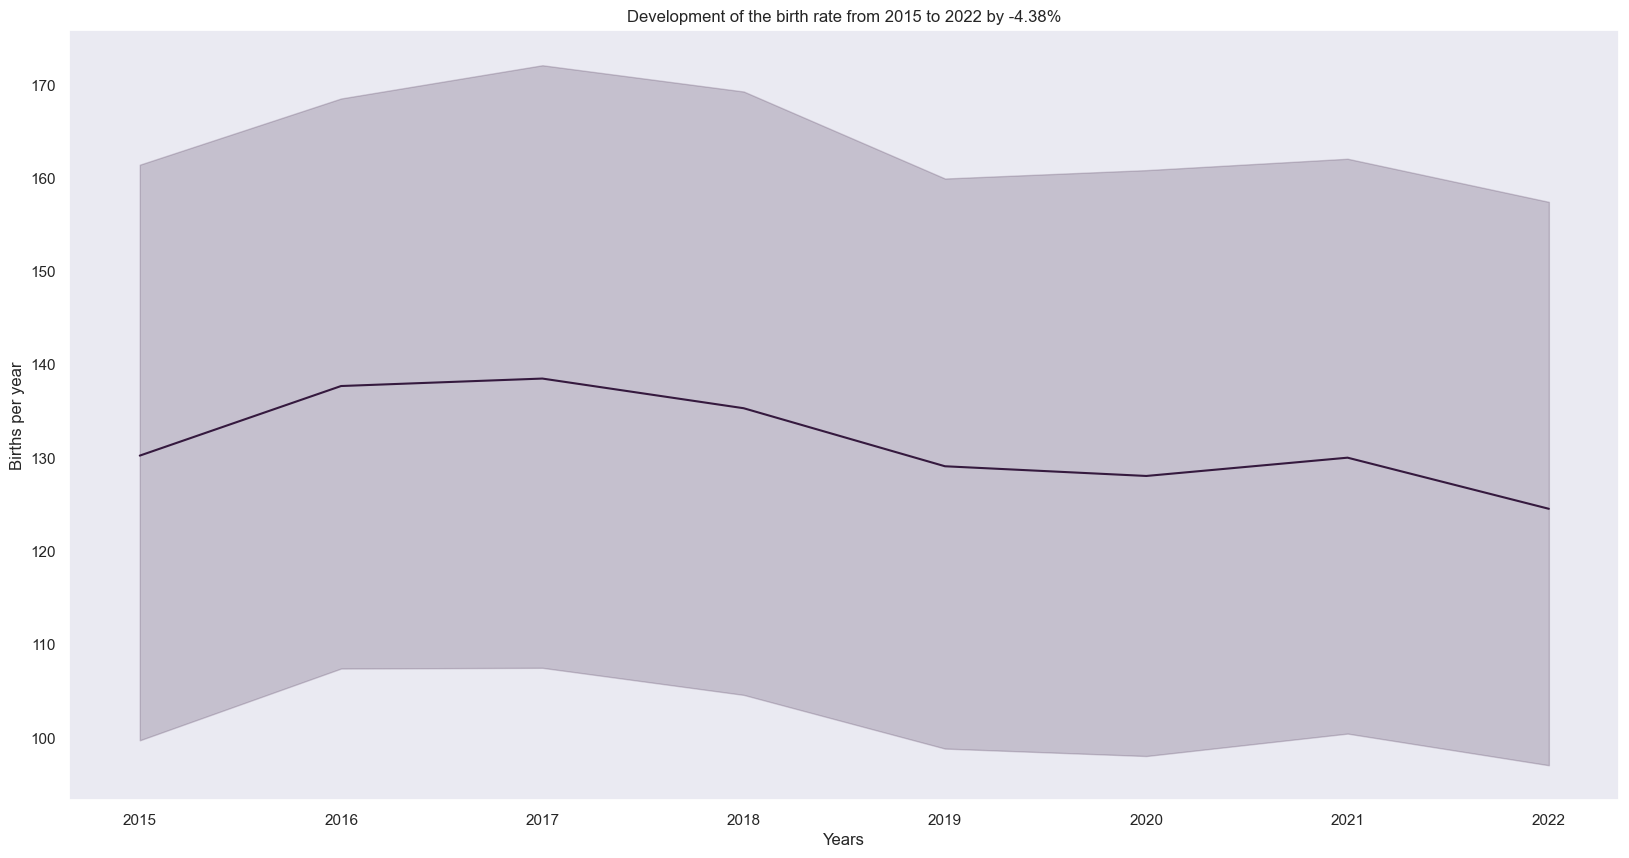

In [18]:
sns.set_palette("rocket") 
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x="jahr", y="geburten")
plt.xlabel("Years")
plt.ylabel("Births per year")
plt.title("Development of the birth rate from 2015 to 2022 by {}%".format(grate))


### 2.Distribution of the number of births

Text(0.5, 1.0, 'Distribution of number of births')

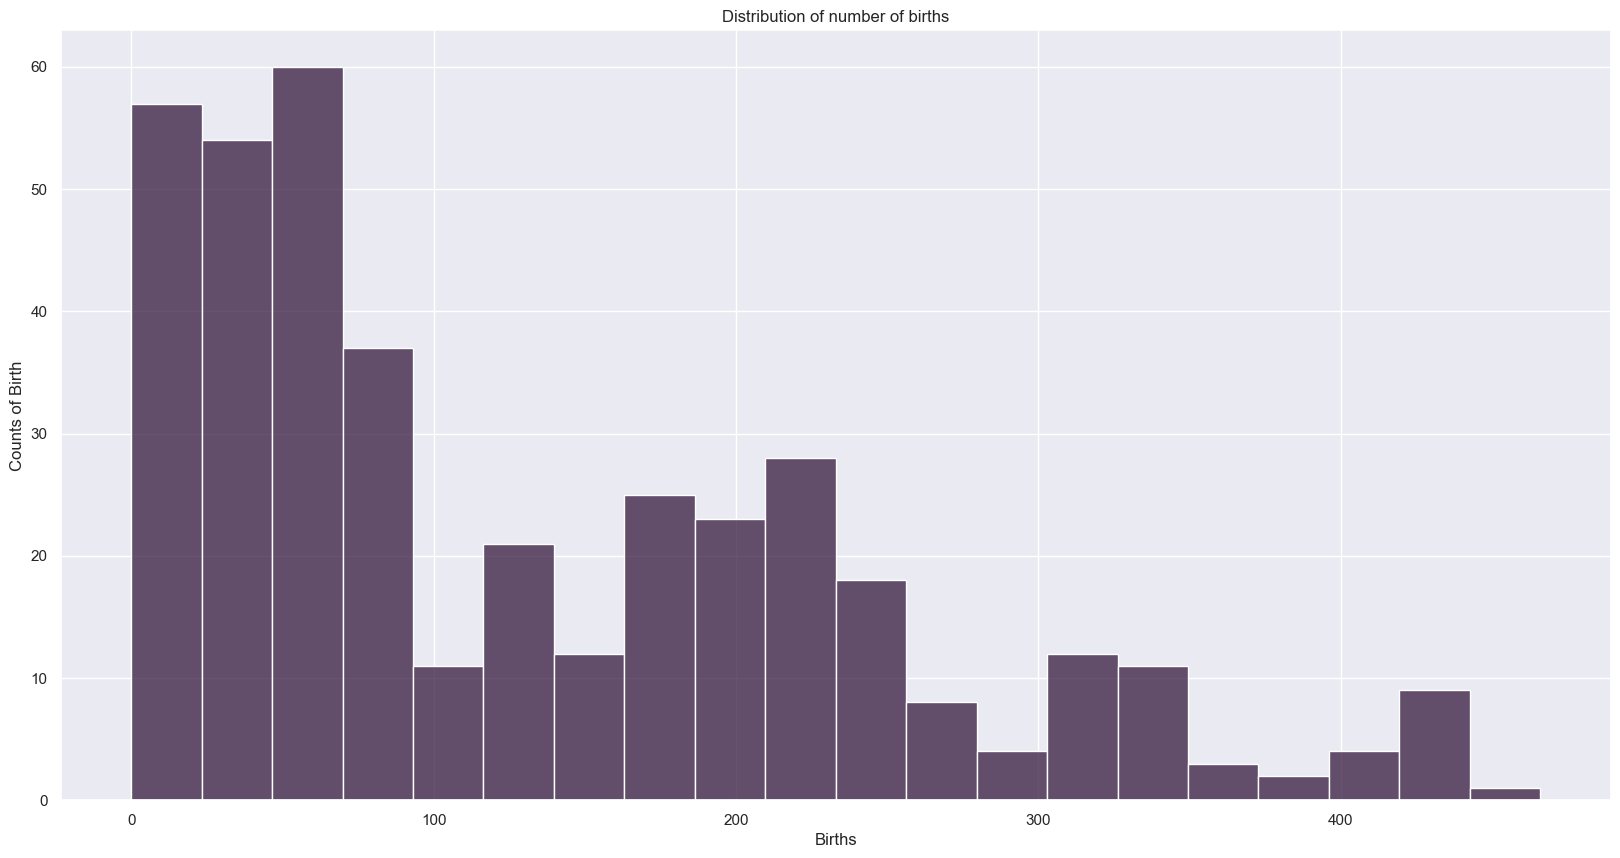

In [19]:
sns.set_theme(style="darkgrid")
sns.set_palette("rocket") 
mean = df.geburten.mean()

plt.figure(figsize=(20,10))
sns.histplot(data=df, x="geburten", bins=20)
plt.xlabel("Births")
plt.ylabel("Counts of Birth")
plt.title("Distribution of number of births")



### 3. Distribution of births per district (boxplot & stacked barplot)


[Text(0, 0, 'Altstadt'),
 Text(1, 0, 'Carlstadt'),
 Text(2, 0, 'Stadtmitte'),
 Text(3, 0, 'Pempelfort'),
 Text(4, 0, 'Derendorf'),
 Text(5, 0, 'Golzheim'),
 Text(6, 0, 'Flingern Süd'),
 Text(7, 0, 'Flingern Nord'),
 Text(8, 0, 'Düsseltal'),
 Text(9, 0, 'Friedrichstadt'),
 Text(10, 0, 'Unterbilk'),
 Text(11, 0, 'Hafen'),
 Text(12, 0, 'Hamm'),
 Text(13, 0, 'Volmerswerth'),
 Text(14, 0, 'Bilk'),
 Text(15, 0, 'Oberbilk'),
 Text(16, 0, 'Flehe'),
 Text(17, 0, 'Oberkassel'),
 Text(18, 0, 'Heerdt'),
 Text(19, 0, 'Lörick'),
 Text(20, 0, 'Niederkassel'),
 Text(21, 0, 'Stockum'),
 Text(22, 0, 'Lohausen'),
 Text(23, 0, 'Kaiserswerth'),
 Text(24, 0, 'Wittlaer'),
 Text(25, 0, 'Angermund'),
 Text(26, 0, 'Kalkum'),
 Text(27, 0, 'Lichtenbroich'),
 Text(28, 0, 'Unterrath'),
 Text(29, 0, 'Rath'),
 Text(30, 0, 'Mörsenbroich'),
 Text(31, 0, 'Gerresheim'),
 Text(32, 0, 'Grafenberg'),
 Text(33, 0, 'Ludenberg'),
 Text(34, 0, 'Hubbelrath'),
 Text(35, 0, 'Knittkuhl'),
 Text(36, 0, 'Lierenfeld'),
 Text(37, 0, 'E

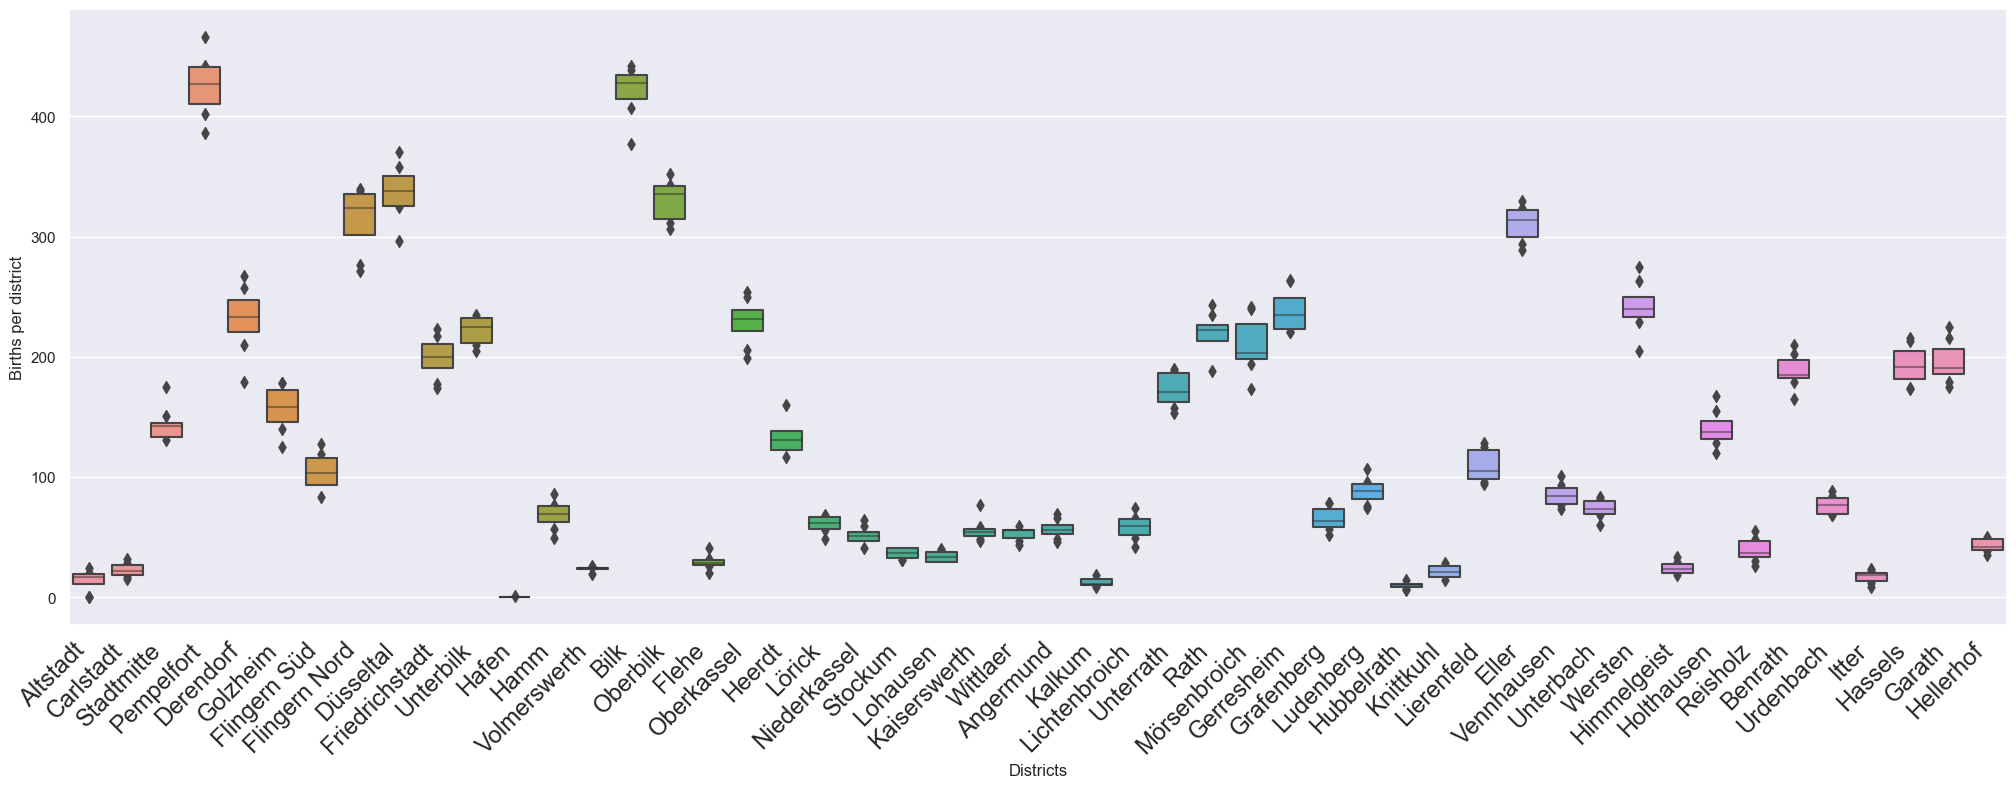

In [20]:
sns.color_palette("rocket", as_cmap=True)
plt.figure(figsize=(25,8))
box = sns.boxenplot(data=df, x="stadtteilname", y="geburten")
plt.xlabel("Districts")
plt.ylabel("Births per district")
box.set_xticklabels(box.get_xticklabels(),
rotation=45,
horizontalalignment='right',
fontsize='x-large')

In [21]:
df.jahr.unique()
df16 = df[(df.jahr == 2016)]
df17 = df[(df.jahr == 2017)]
df18 = df[(df.jahr == 2018)]
df19 = df[(df.jahr == 2019)]
df20 = df[(df.jahr == 2020)]
df21 = df[(df.jahr == 2021)]


[Text(0, 0, 'Altstadt'),
 Text(1, 0, 'Carlstadt'),
 Text(2, 0, 'Stadtmitte'),
 Text(3, 0, 'Pempelfort'),
 Text(4, 0, 'Derendorf'),
 Text(5, 0, 'Golzheim'),
 Text(6, 0, 'Flingern Süd'),
 Text(7, 0, 'Flingern Nord'),
 Text(8, 0, 'Düsseltal'),
 Text(9, 0, 'Friedrichstadt'),
 Text(10, 0, 'Unterbilk'),
 Text(11, 0, 'Hafen'),
 Text(12, 0, 'Hamm'),
 Text(13, 0, 'Volmerswerth'),
 Text(14, 0, 'Bilk'),
 Text(15, 0, 'Oberbilk'),
 Text(16, 0, 'Flehe'),
 Text(17, 0, 'Oberkassel'),
 Text(18, 0, 'Heerdt'),
 Text(19, 0, 'Lörick'),
 Text(20, 0, 'Niederkassel'),
 Text(21, 0, 'Stockum'),
 Text(22, 0, 'Lohausen'),
 Text(23, 0, 'Kaiserswerth'),
 Text(24, 0, 'Wittlaer'),
 Text(25, 0, 'Angermund'),
 Text(26, 0, 'Kalkum'),
 Text(27, 0, 'Lichtenbroich'),
 Text(28, 0, 'Unterrath'),
 Text(29, 0, 'Rath'),
 Text(30, 0, 'Mörsenbroich'),
 Text(31, 0, 'Gerresheim'),
 Text(32, 0, 'Grafenberg'),
 Text(33, 0, 'Ludenberg'),
 Text(34, 0, 'Hubbelrath'),
 Text(35, 0, 'Knittkuhl'),
 Text(36, 0, 'Lierenfeld'),
 Text(37, 0, 'E

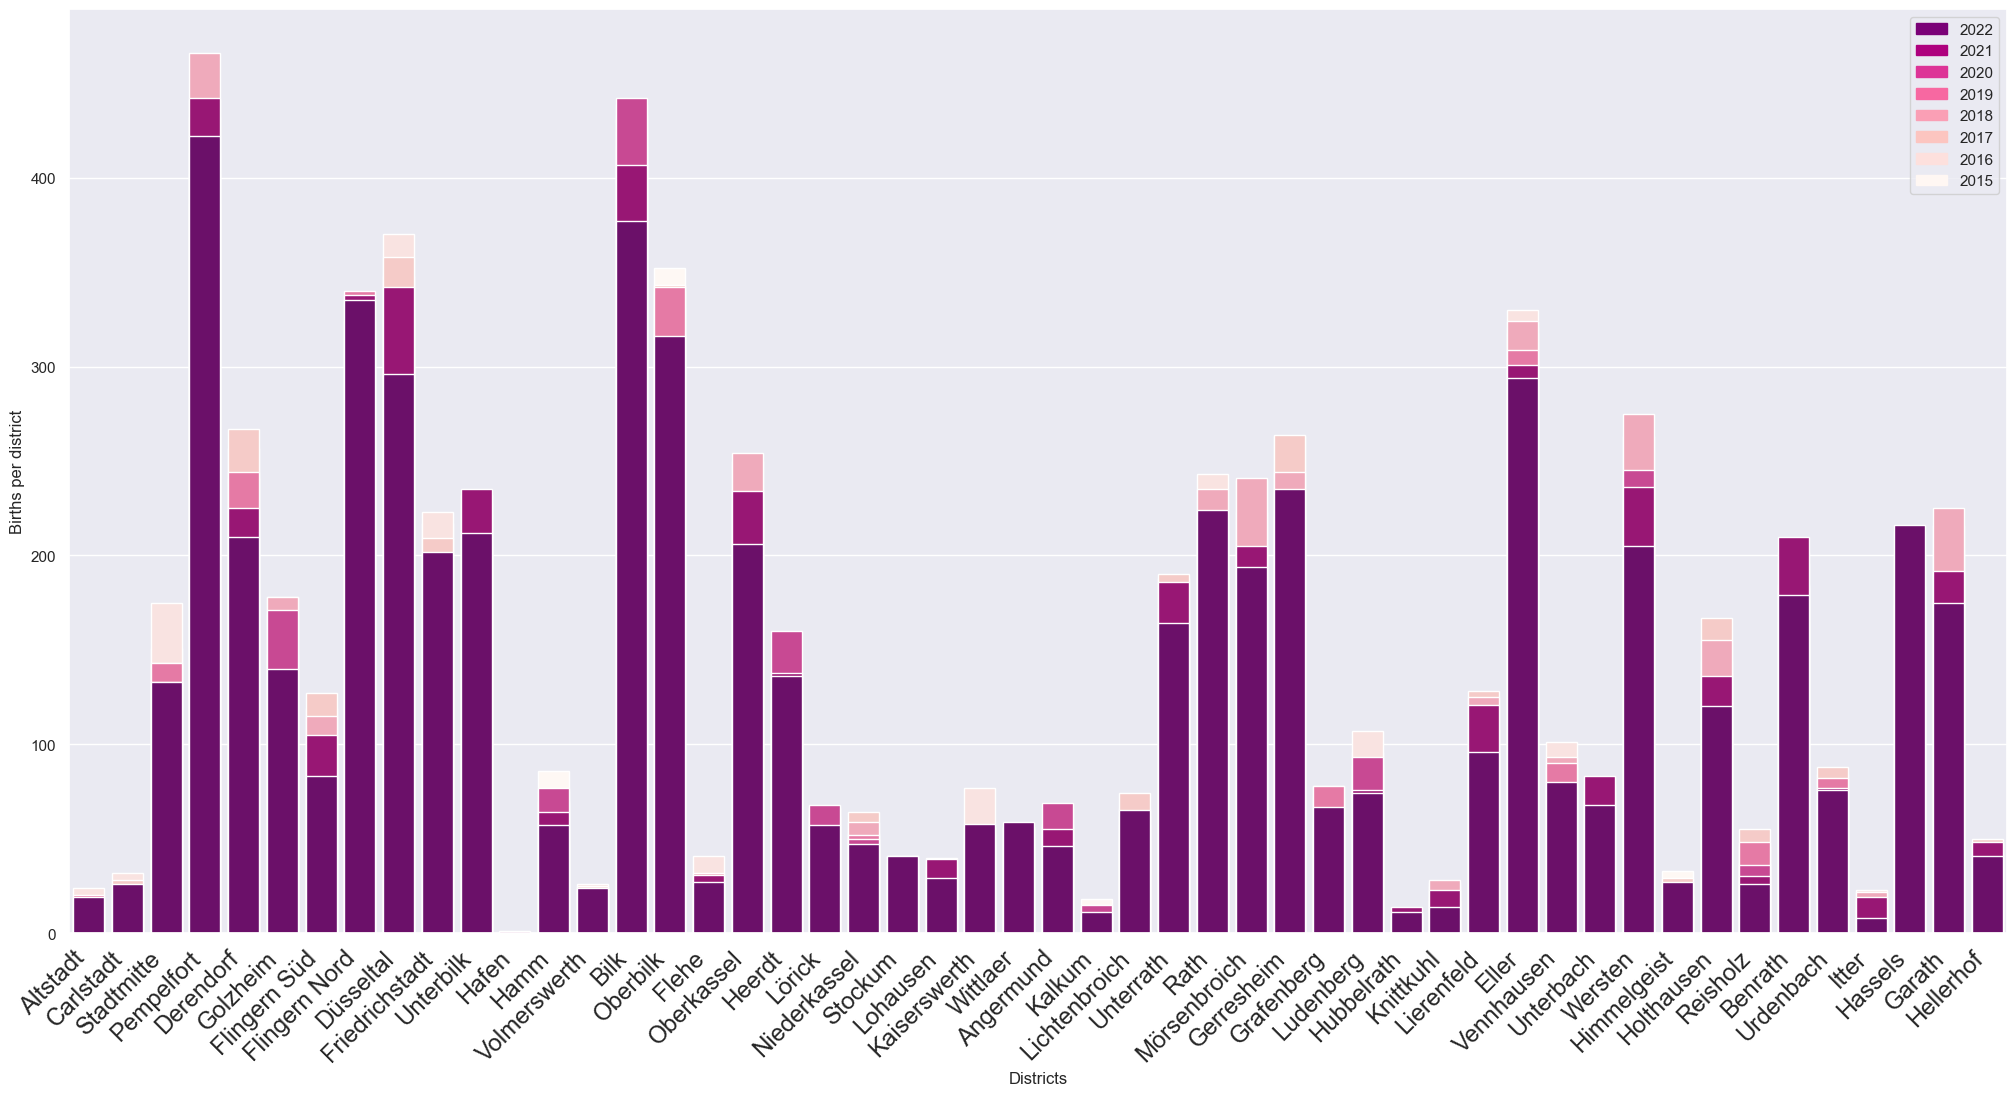

In [22]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(25,12))
box = sns.barplot(data=df15, x="stadtteilname", y="geburten", color="#fff7f3")
sns.barplot(data=df16, x="stadtteilname", y="geburten", color="#fde0dd")
sns.barplot(data=df17, x="stadtteilname", y="geburten", color="#fcc5c0")
sns.barplot(data=df18, x="stadtteilname", y="geburten", color="#fa9fb5")
sns.barplot(data=df19, x="stadtteilname", y="geburten", color="#f768a1")
sns.barplot(data=df20, x="stadtteilname", y="geburten", color="#dd3497")
sns.barplot(data=df21, x="stadtteilname", y="geburten", color="#ae017e")
sns.barplot(data=df22, x="stadtteilname", y="geburten", color="#7a0177")
df15l = mpatches.Patch(color="#fff7f3", label="2015")
df16l = mpatches.Patch(color="#fde0dd", label="2016")
df17l = mpatches.Patch(color="#fcc5c0", label="2017")
df18l = mpatches.Patch(color="#fa9fb5", label="2018")
df19l = mpatches.Patch(color="#f768a1", label="2019")
df20l = mpatches.Patch(color="#dd3497", label="2020")
df21l = mpatches.Patch(color="#ae017e", label="2021")
df22l = mpatches.Patch(color="#7a0177", label="2022")

plt.xlabel("Districts")
plt.ylabel("Births per district")
plt.legend(handles=[df22l,df21l,df20l,df19l,df18l,df17l,df16l,df15l])
box.set_xticklabels(box.get_xticklabels(),rotation=45,horizontalalignment='right',fontsize='x-large')

### 4. Sorted distribution of the total births per district


[Text(0, 0, 'Pempelfort'),
 Text(1, 0, 'Bilk'),
 Text(2, 0, 'Düsseltal'),
 Text(3, 0, 'Oberbilk'),
 Text(4, 0, 'Flingern Nord'),
 Text(5, 0, 'Eller'),
 Text(6, 0, 'Wersten'),
 Text(7, 0, 'Gerresheim'),
 Text(8, 0, 'Derendorf'),
 Text(9, 0, 'Oberkassel'),
 Text(10, 0, 'Unterbilk'),
 Text(11, 0, 'Rath'),
 Text(12, 0, 'Mörsenbroich'),
 Text(13, 0, 'Friedrichstadt'),
 Text(14, 0, 'Garath'),
 Text(15, 0, 'Hassels'),
 Text(16, 0, 'Benrath'),
 Text(17, 0, 'Unterrath'),
 Text(18, 0, 'Golzheim'),
 Text(19, 0, 'Stadtmitte'),
 Text(20, 0, 'Holthausen'),
 Text(21, 0, 'Heerdt'),
 Text(22, 0, 'Lierenfeld'),
 Text(23, 0, 'Flingern Süd'),
 Text(24, 0, 'Ludenberg'),
 Text(25, 0, 'Vennhausen'),
 Text(26, 0, 'Urdenbach'),
 Text(27, 0, 'Unterbach'),
 Text(28, 0, 'Hamm'),
 Text(29, 0, 'Grafenberg'),
 Text(30, 0, 'Lörick'),
 Text(31, 0, 'Lichtenbroich'),
 Text(32, 0, 'Angermund'),
 Text(33, 0, 'Kaiserswerth'),
 Text(34, 0, 'Wittlaer'),
 Text(35, 0, 'Niederkassel'),
 Text(36, 0, 'Hellerhof'),
 Text(37, 0, 'R

<Figure size 2500x800 with 0 Axes>

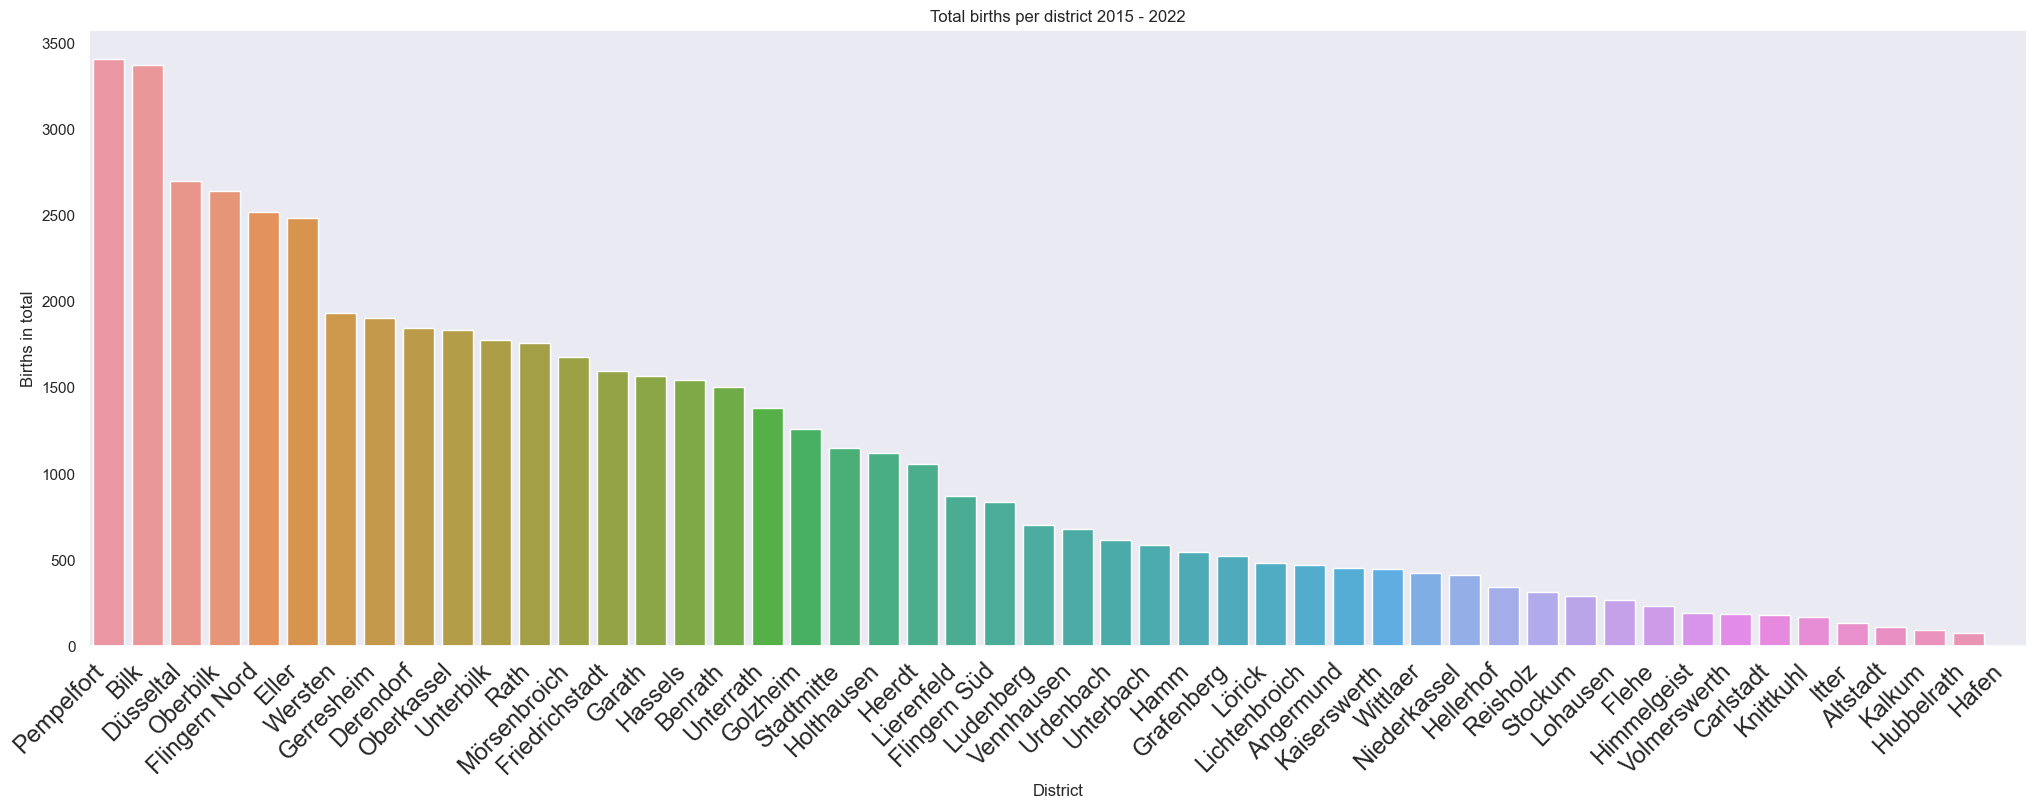

In [23]:
sns.set_theme(style="dark")
plt.figure(figsize=(25,8))
geburten_total = df.groupby("stadtteilname").sum().reset_index()
unique_stadt = df.stadtteilname.unique()
plt.figure(figsize=(25,8))
sorted_group= geburten_total.sort_values(['geburten'], ascending=False).reset_index(drop=False)
sorted_bar = sns.barplot(x=sorted_group.stadtteilname, y=sorted_group.geburten)
plt.xlabel("District")
plt.ylabel("Births in total")
plt.title("Total births per district 2015 - 2022")
sorted_bar.set_xticklabels(sorted_bar.get_xticklabels(),
rotation=45,horizontalalignment='right',fontsize='x-large')


### 5. Highest districts birth rates per year (top 3)

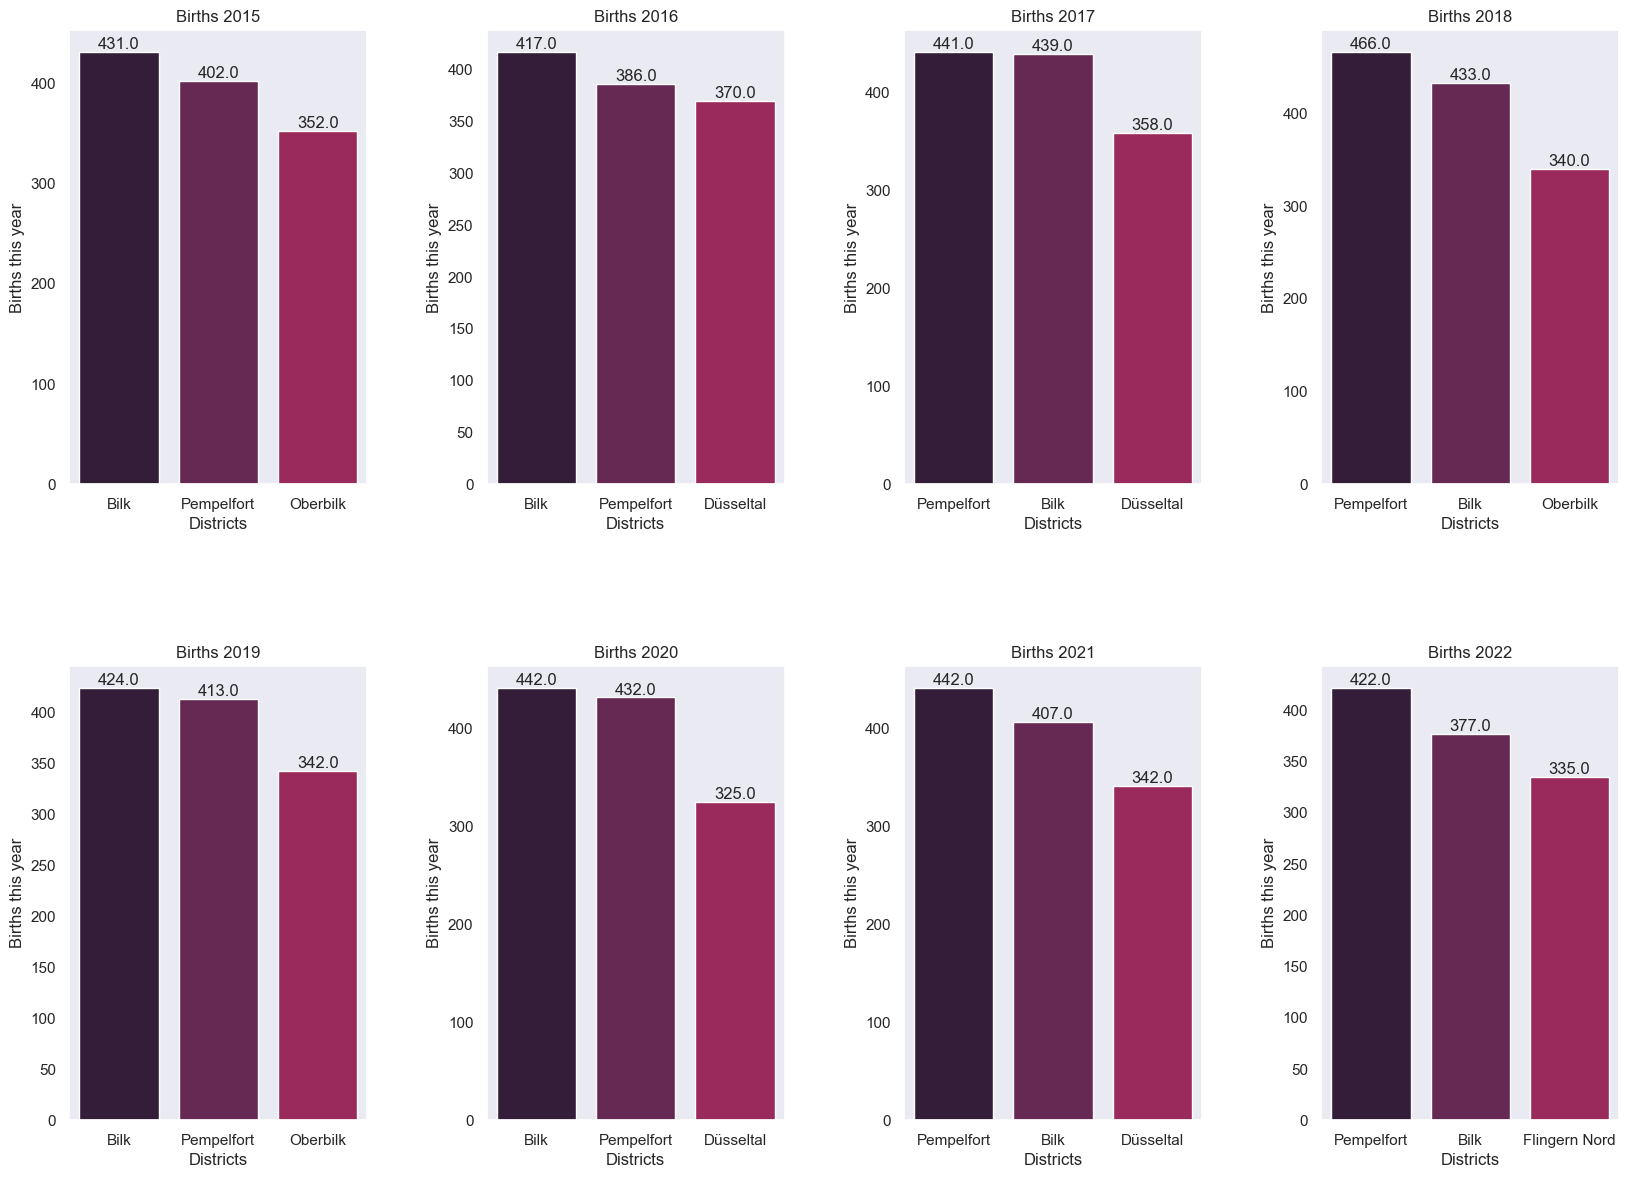

In [24]:
geburten_total = df.groupby("stadtteilname").sum().reset_index()

gdf15 = df15.groupby("stadtteilname").sum().reset_index() 
gdf15 = gdf15.sort_values(["geburten"], ascending=False).reset_index(drop=False)
gdf16 = df16.groupby("stadtteilname").sum().reset_index() 
gdf16 = gdf16.sort_values(["geburten"], ascending=False).reset_index(drop=False)
gdf17 = df17.groupby("stadtteilname").sum().reset_index() 
gdf17 = gdf17.sort_values(["geburten"], ascending=False).reset_index(drop=False)
gdf18 = df18.groupby("stadtteilname").sum().reset_index() 
gdf18 = gdf18.sort_values(["geburten"], ascending=False).reset_index(drop=False)
gdf19 = df19.groupby("stadtteilname").sum().reset_index() 
gdf19 = gdf19.sort_values(["geburten"], ascending=False).reset_index(drop=False)
gdf20 = df20.groupby("stadtteilname").sum().reset_index() 
gdf20 = gdf20.sort_values(["geburten"], ascending=False).reset_index(drop=False)
gdf21 = df21.groupby("stadtteilname").sum().reset_index() 
gdf21 = gdf21.sort_values(["geburten"], ascending=False).reset_index(drop=False)
gdf22 = df22.groupby("stadtteilname").sum().reset_index() 
gdf22 = gdf22.sort_values(["geburten"], ascending=False).reset_index(drop=False)


plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.subplots_adjust(wspace = 0.4, hspace=0.4,top=1.2)


sns.set_palette("rocket") 
g1 = sns.barplot(data=gdf15.head(3), x="stadtteilname", y="geburten")
plt.title("Births 2015")
plt.ylabel("Births this year")
plt.xlabel("Districts")
plt.subplot(2,4,2)
g2 = sns.barplot(data=gdf16.head(3), x="stadtteilname", y="geburten")
plt.title("Births 2016")
plt.ylabel("Births this year")
plt.xlabel("Districts")
plt.subplot(2,4,3)
g3 = sns.barplot(data=gdf17.head(3), x="stadtteilname", y="geburten")
plt.title("Births 2017")
plt.ylabel("Births this year")
plt.xlabel("Districts")
plt.subplot(2,4,4)
g4 = sns.barplot(data=gdf18.head(3), x="stadtteilname", y="geburten")
plt.title("Births 2018")
plt.ylabel("Births this year")
plt.xlabel("Districts")
plt.subplot(2,4,5)
g5 = sns.barplot(data=gdf19.head(3), x="stadtteilname", y="geburten")
plt.title("Births 2019")
plt.ylabel("Births this year")
plt.xlabel("Districts")
plt.subplot(2,4,6)
g6 = sns.barplot(data=gdf20.head(3), x="stadtteilname", y="geburten")
plt.title("Births 2020")
plt.ylabel("Births this year")
plt.xlabel("Districts")
plt.subplot(2,4,7)
g7 = sns.barplot(data=gdf21.head(3), x="stadtteilname", y="geburten")
plt.title("Births 2021")
plt.ylabel("Births this year")
plt.xlabel("Districts")
plt.subplot(2,4,8)
g8 = sns.barplot(data=gdf22.head(3), x="stadtteilname", y="geburten")
plt.title("Births 2022")
plt.ylabel("Births this year")
plt.xlabel("Districts")

graphlist=[g1,g2,g3,g4,g5,g6,g7,g8]

for graph in graphlist:
    for container in graph.containers:
        graph.bar_label(container, fmt='%.1f')
